# **Exploratory Data Analysis Project**
This notebook aims at practicing data analysis and using the data for a simple machine learning task. The dataset was downloaded from an official EU database and was originally provided by the Central Statistics Office of the Irish government. It represents information about the employment rate between 2019 and 2024.

In [52]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## **1. Retrieving Data**

In [53]:
# load the dataset and print the first five rows
df = pd.read_csv('dataset.csv')
df.head()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02199V02655,Sex,C04283V05060,Education Attainment Level,C02076V02508,Age Group,UNIT,VALUE
0,QLF50C01,Employment rate,20191,2019Q1,-,Both sexes,-,Levels of Education (Levels 0-8),-,All ages,%,74.9
1,QLF50C01,Employment rate,20191,2019Q1,-,Both sexes,-,Levels of Education (Levels 0-8),365,20 - 24 years,%,64.0
2,QLF50C01,Employment rate,20191,2019Q1,-,Both sexes,-,Levels of Education (Levels 0-8),410,25 - 29 years,%,80.1
3,QLF50C01,Employment rate,20191,2019Q1,-,Both sexes,-,Levels of Education (Levels 0-8),4251,25 - 54 years,%,80.1
4,QLF50C01,Employment rate,20191,2019Q1,-,Both sexes,-,Levels of Education (Levels 0-8),440,30 - 34 years,%,81.4


## **2. Understanding the Data**

In [54]:
# extract the number of rows and columns
nrows, ncols = df.shape
print(f"The dataset has {ncols} columns and {nrows} rows.")

The dataset has 12 columns and 4752 rows.


After inspecting the data in datawrangler, the following general findings were made:

- the main column of interest is `Value`, which gives the employment rate of a certain sex, age and education group throughout a quarter in the years 2019 - 2024
- `TLIST(Q1)` and `Quarter` both represents the quarter in numerical (e.g. 20191) and object format (e.g. 2019Q1)
- besides separate entries for different sex, age and education, there are also entries summarizing each group (e.g. both sexes). This allows for a global as well as local analysis

In [55]:
# isolate the relevant columns and change the column names to make them more usable
df = df.loc[:, ["Quarter", "Sex", "Education Attainment Level", "Age Group", "VALUE"]]
df.columns = ["quarter", "sex", "education", "age", "employment"]
df.head()

,quarter,sex,education,age,employment
0,2019Q1,Both sexes,Levels of Education (Levels 0-8),All ages,74.9
1,2019Q1,Both sexes,Levels of Education (Levels 0-8),20 - 24 years,64.0
2,2019Q1,Both sexes,Levels of Education (Levels 0-8),25 - 29 years,80.1
3,2019Q1,Both sexes,Levels of Education (Levels 0-8),25 - 54 years,80.1
4,2019Q1,Both sexes,Levels of Education (Levels 0-8),30 - 34 years,81.4


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   quarter     4752 non-null   object 
 1   sex         4752 non-null   object 
 2   education   4752 non-null   object 
 3   age         4752 non-null   object 
 4   employment  3201 non-null   float64
dtypes: float64(1), object(4)
memory usage: 185.8+ KB


**Result**:
- dataset with 5 columns and 4752 rows
- 4 categorical features (`quarter`, `sex`, `education`, `age`) 
- 1 continuous feature (`employment`)

## **Data Cleaning**

In [57]:
# check for duplicates
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,quarter,sex,education,age,employment


There are no duplicated rows. However, there are many redundant rows since sex is divided into male, female and both sexes. Same is true for education and ages. The combined rows will be removed.

In [58]:
df.shape

(4752, 5)

In [59]:
# identify unique values in categorical columns
print(df["quarter"].unique())
print(df["sex"].unique())
print(df["education"].unique())
print(df["age"].unique())

['2019Q1' '2019Q2' '2019Q3' '2019Q4' '2020Q1' '2020Q2' '2020Q3' '2020Q4'
 '2021Q1' '2021Q2' '2021Q3' '2021Q4' '2022Q1' '2022Q2' '2022Q3' '2022Q4'
 '2023Q1' '2023Q2' '2023Q3' '2023Q4' '2024Q1' '2024Q2' '2024Q3' '2024Q4']
['Both sexes' 'Male' 'Female']
['Levels of Education (Levels  0-8)' 'Less than primary (Level 0)'
 'Primary and lower secondary education (Levels 1-2)'
 'Upper secondary and post-secondary non-tertiary education (Levels 3 and 4)'
 'Tertiary education (Levels 5-8)' 'Level of education - not stated']
['All ages' '20 - 24 years' '25 - 29 years' '25 - 54 years'
 '30 - 34 years' '35 - 39 years' '40 - 44 years' '45 - 49 years'
 '50 - 54 years' '55 - 59 years' '60 - 64 years']


In [60]:
# remove combined rows
df = df[df["sex"] != "Both sexes"]
df = df[df["education"] != "Levels of Education (Levels  0-8)"]
df = df[df["education"] != 'Level of education - not stated']
df = df[df["age"] != "All ages"]
df = df[df["age"] != '25 - 54 years']
df.reset_index(drop=True, inplace=True)
df.head()

,quarter,sex,education,age,employment
0,2019Q1,Male,Less than primary (Level 0),20 - 24 years,NaN
1,2019Q1,Male,Less than primary (Level 0),25 - 29 years,NaN
2,2019Q1,Male,Less than primary (Level 0),30 - 34 years,NaN
3,2019Q1,Male,Less than primary (Level 0),35 - 39 years,NaN
4,2019Q1,Male,Less than primary (Level 0),40 - 44 years,NaN


In [61]:
# replace names so they are more usable

# education
df["education"] = df["education"].replace({
    'Less than primary (Level 0)': 'Level 0', 
    'Primary and lower secondary education (Levels 1-2)': 'Level 1-2',
    'Upper secondary and post-secondary non-tertiary education (Levels 3 and 4)': 'Level 3-4',
    'Tertiary education (Levels 5-8)': 'Level 5-8',
})

# age
df["age"] = df["age"].replace({
    '20 - 24 years': '20-24',
    '25 - 29 years': '25-29',
    '30 - 34 years': '30-34',
    '35 - 39 years': '35-39',
    '40 - 44 years': '40-44',
    '45 - 49 years': '45-49',
    '50 - 54 years': '50-54',
    '55 - 59 years': '55-59',
    '60 - 64 years': '60-64'})

In [62]:
# identify unique values in categorical columns
print(df["quarter"].unique())
print(df["sex"].unique())
print(df["education"].unique())
print(df["age"].unique())

['2019Q1' '2019Q2' '2019Q3' '2019Q4' '2020Q1' '2020Q2' '2020Q3' '2020Q4'
 '2021Q1' '2021Q2' '2021Q3' '2021Q4' '2022Q1' '2022Q2' '2022Q3' '2022Q4'
 '2023Q1' '2023Q2' '2023Q3' '2023Q4' '2024Q1' '2024Q2' '2024Q3' '2024Q4']
['Male' 'Female']
['Level 0' 'Level 1-2' 'Level 3-4' 'Level 5-8']
['20-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64']


In [63]:
df.shape

(1728, 5)

In [64]:
# Check for missing data
df.isnull().sum()

quarter         0
sex             0
education       0
age             0
employment    603
dtype: int64

1551 values are missing in the column employment. I decide to drop them.

In [65]:
# Dataset before handling missing values
df.shape

(1728, 5)

In [66]:
# Drop the missing values
df.dropna(inplace = True)

#Dataset after missing values are dropped
df.shape

(1125, 5)

In [67]:
# identify outliers in numerical features with descriptive analysis
df.describe()

,employment
count,1125.000000
mean,72.965067
std,16.099338
min,26.900000
25%,63.900000
50%,74.100000
75%,86.400000
max,97.700000


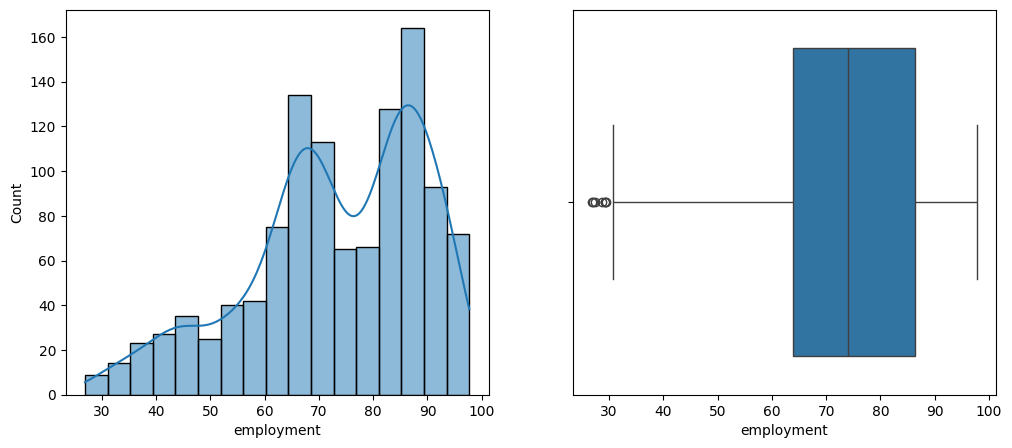

In [68]:
# plot histogram and boxplot of numerical feature
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["employment"], kde=True, ax=ax1)
sns.boxplot(x=df["employment"], ax=ax2)
plt.show()

`employment` has a right skewed distribution with two peaks at 68% and 86%. According to the boxplot, `employment` has a moderate number of outliers. Since they don't seem erroeneous and are part of the underlying distribution, they are kept.

## **Feature Engineering**

In [69]:
categorical = df[["quarter", "sex", "education", "age"]]
categorical.head()

,quarter,sex,education,age
10,2019Q1,Male,Level 1-2,25-29
11,2019Q1,Male,Level 1-2,30-34
12,2019Q1,Male,Level 1-2,35-39
13,2019Q1,Male,Level 1-2,40-44
14,2019Q1,Male,Level 1-2,45-49


In [70]:
numerical = df[["employment"]]
skew_limit = 0.75 
skew_vals = numerical.skew()
skew_vals

employment   -0.669389
dtype: float64

`employment` has a negative skew with a tail to the left. It doesn't exceed the skew limit of 0.75. A pairplot could help identify correlations between features. However, there is only one numerical feature. Let's look at the distribution of categorical features.

## **Catplot**
I will use catplot to identify patterns and correlations in the data.

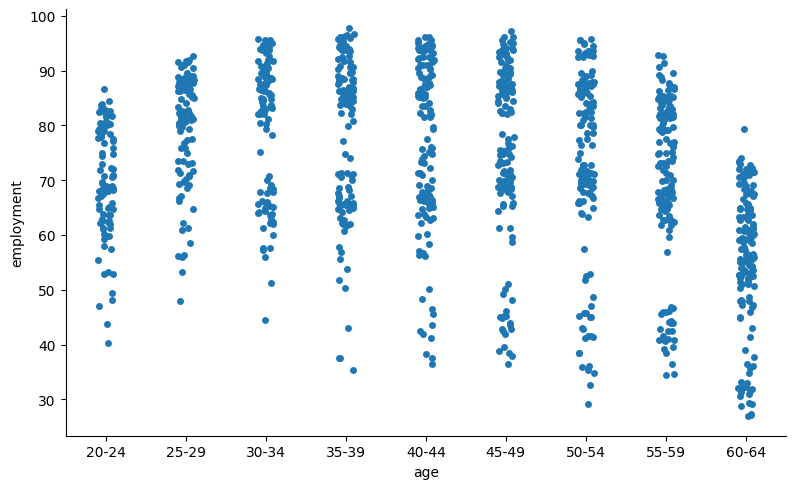

In [71]:
sns.catplot(data=df, x="age", y="employment", height=5, aspect=8/5, order=['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64'])
plt.show()

The maximum employment rate tends to increase between ages 20 and 35, where it reaches a maximum. From ages 54, the employment decreases again. The minimum employment rate varies. Let's now look at how the employment rate is distributed among sex.

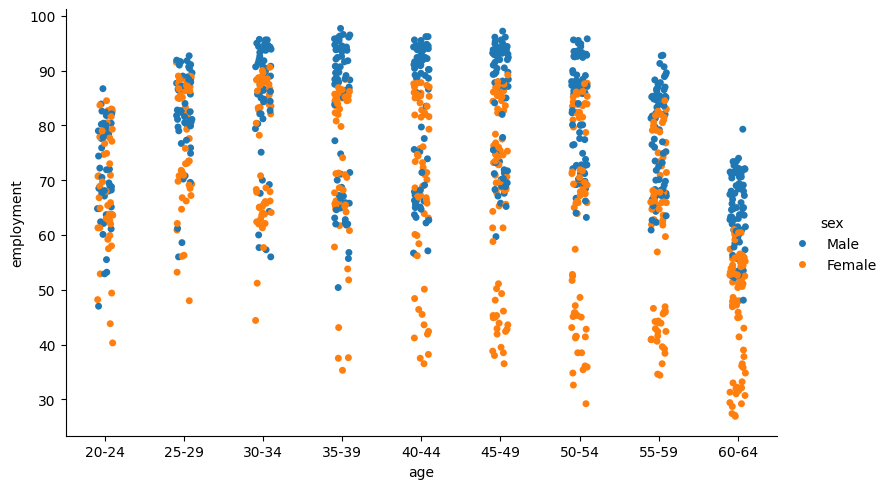

In [72]:
sns.catplot(data=df, x="age", y="employment", hue="sex", height=5, aspect=8/5, order=['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64'])
plt.show()

The employment rate significantly differs between male and female. While there is less difference for young adults (ages 20-29), the difference becomes larger with age, which can be traced back to the demographic progress. At ages 60-64, there is a large shift between male and female employment. Increasingly apparent also becomes a cluster with lower employment solely including females. Let's now look how this behaves for different levels of education.

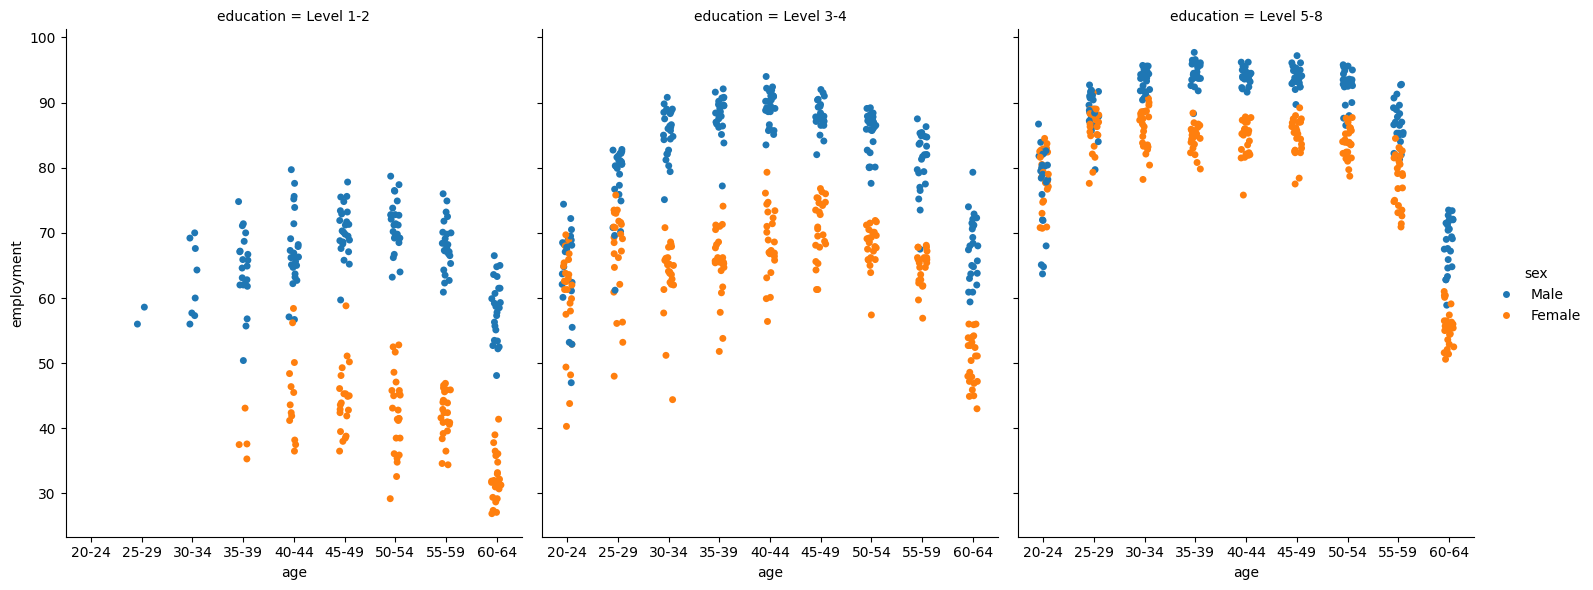

In [77]:
sns.catplot(data=df, x="age", y="employment", col="education", hue="sex", height=6, aspect=5/6, order=['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64'])
plt.show()

The levels 1-2 of education are primary and lower secondary education, typically finished by students at age 15. The levels 3-4 are upper secondary and post-secondary non-tertiary education, which are finished around ages 17-18. Levels 5-8 include tertiary, i.e. higher, education in universities and colleges. Genereally, the employment rate increases with the education level. The gap between female and male employment rate clearly correlates with the education level and is less significant for higher education levels.